In [2]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.patches as patches 
import os 
import sys 

import warnings

warnings.filterwarnings("ignore")

In [3]:
image = cv.imread("lenna.png") 
image.shape 

(512, 512, 3)

### Pixels and Image Size

(1173, 1200)


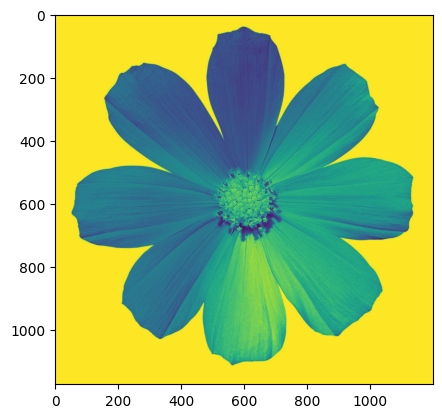

In [3]:
img = cv.imread("petal.jpg", cv.IMREAD_GRAYSCALE) 
print(img.shape) 
plt.imshow(img) 

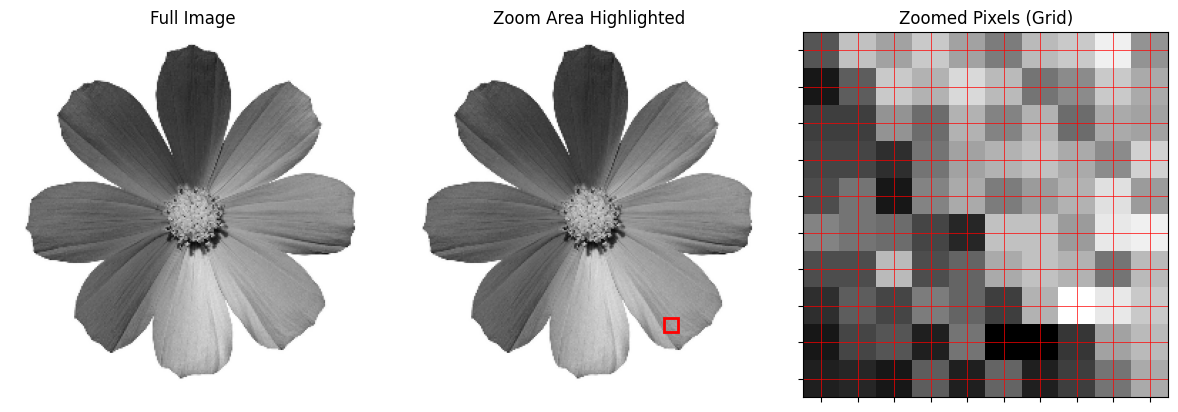

In [4]:
# Resize for clarity (keep it small for demo)
img_resized = cv.resize(img, (256, 256))
# Define the area to zoom into
x_start, y_start = 180, 200
zoom_size = 10
zoomed_img = img_resized[y_start:y_start+zoom_size, x_start:x_start+zoom_size]

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 1. Full grayscale image
axes[0].imshow(img_resized, cmap='gray')
axes[0].set_title("Full Image")
axes[0].axis('off')

# 2. Same image with red rectangle highlighting zoom area
axes[1].imshow(img_resized, cmap='gray')
rect = patches.Rectangle((x_start, y_start), zoom_size, zoom_size,
                         linewidth=2, edgecolor='red', facecolor='none')
axes[1].add_patch(rect)
axes[1].set_title("Zoom Area Highlighted")
axes[1].axis('off')

# 3. Zoomed-in region with pixel grid
axes[2].imshow(zoomed_img, cmap='gray', interpolation='nearest')
axes[2].set_title("Zoomed Pixels (Grid)")
axes[2].set_xticks(np.arange(0, zoom_size, 1))
axes[2].set_yticks(np.arange(0, zoom_size, 1))
axes[2].grid(color='red', linewidth=0.5)
axes[2].set_xticklabels([])
axes[2].set_yticklabels([])

plt.tight_layout()
plt.show()

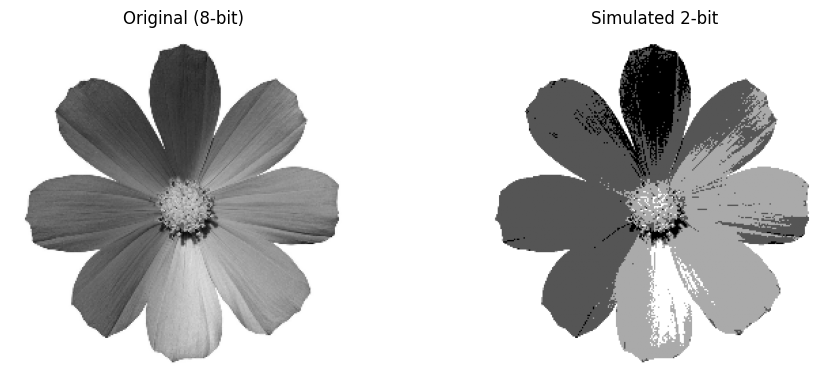

In [5]:
# Quantizing grayscale image to 2-bit
gray_8bit = cv.resize(img, (256, 256))
gray_2bit = np.floor(gray_8bit / 64) * 64  # Only 4 levels: 0, 64, 128, 192

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_8bit, cmap='gray')
plt.title('Original (8-bit)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_2bit.astype(np.uint8), cmap='gray')
plt.title('Simulated 2-bit')
plt.axis('off')
plt.tight_layout()
plt.show()


### RGB (3 channel image)

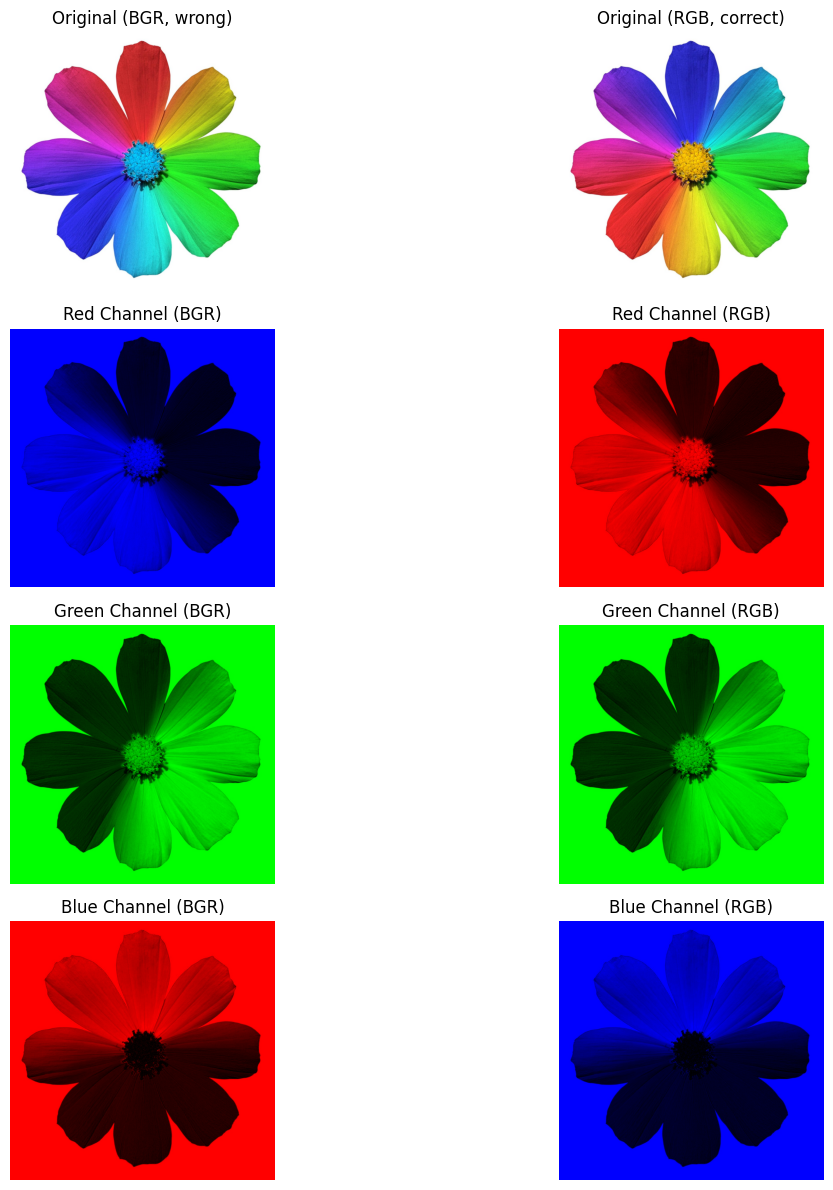

In [13]:
image = cv.imread("petal.jpg") 

# by default, opencv reads an image in BGR format
B, G, R = cv.split(image)

zeros = np.zeros_like(B) 

# in BGR format
red_colored = cv.merge([zeros, zeros, R])
green_colored = cv.merge([zeros, G, zeros])
blue_colored = cv.merge([B, zeros, zeros])

# Prepare RGB-converted versions
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
red_colored_rgb = cv.cvtColor(red_colored, cv.COLOR_BGR2RGB)
green_colored_rgb = cv.cvtColor(green_colored, cv.COLOR_BGR2RGB)
blue_colored_rgb = cv.cvtColor(blue_colored, cv.COLOR_BGR2RGB)

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(14, 12))

axs[0, 0].imshow(image)
axs[0, 0].set_title("Original (BGR, wrong)")
axs[0, 1].imshow(image_rgb)
axs[0, 1].set_title("Original (RGB, correct)")

axs[1, 0].imshow(red_colored)
axs[1, 0].set_title("Red Channel (BGR)")
axs[1, 1].imshow(red_colored_rgb)
axs[1, 1].set_title("Red Channel (RGB)")

axs[2, 0].imshow(green_colored)
axs[2, 0].set_title("Green Channel (BGR)")
axs[2, 1].imshow(green_colored_rgb)
axs[2, 1].set_title("Green Channel (RGB)")

axs[3, 0].imshow(blue_colored)
axs[3, 0].set_title("Blue Channel (BGR)")
axs[3, 1].imshow(blue_colored_rgb)
axs[3, 1].set_title("Blue Channel (RGB)")

# Remove axes
for ax_row in axs:
    for ax in ax_row:
        ax.axis("off")

plt.tight_layout()
plt.show()

### Different color spaces

In [14]:

def visualize_color_space(image_bgr, color_space_name, conversion_code, channel_labels):
    # Convert to target color space
    converted = cv.cvtColor(image_bgr, conversion_code)
    channels = cv.split(converted)
    
    zeros = np.zeros_like(channels[0])

    # Colored representation (in target color space unless RGB)
    colored_images = []
    for i in range(3):
        # Create image with only one channel active
        channel = [zeros]*3
        channel[i] = channels[i]
        merged = cv.merge(channel)
        # Convert to RGB for display (if not already RGB)
        if color_space_name != "RGB":
            merged = cv.cvtColor(merged, cv.COLOR_BGR2RGB)
        colored_images.append(merged)

    # For display
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    fig.suptitle(f"{color_space_name} Color Space", fontsize=16)

    for i in range(3):
        axs[i, 0].imshow(channels[i], cmap='gray')
        axs[i, 0].set_title(f"{channel_labels[i]} (Grayscale)")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(colored_images[i])
        axs[i, 1].set_title(f"{channel_labels[i]} (Colored)")
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

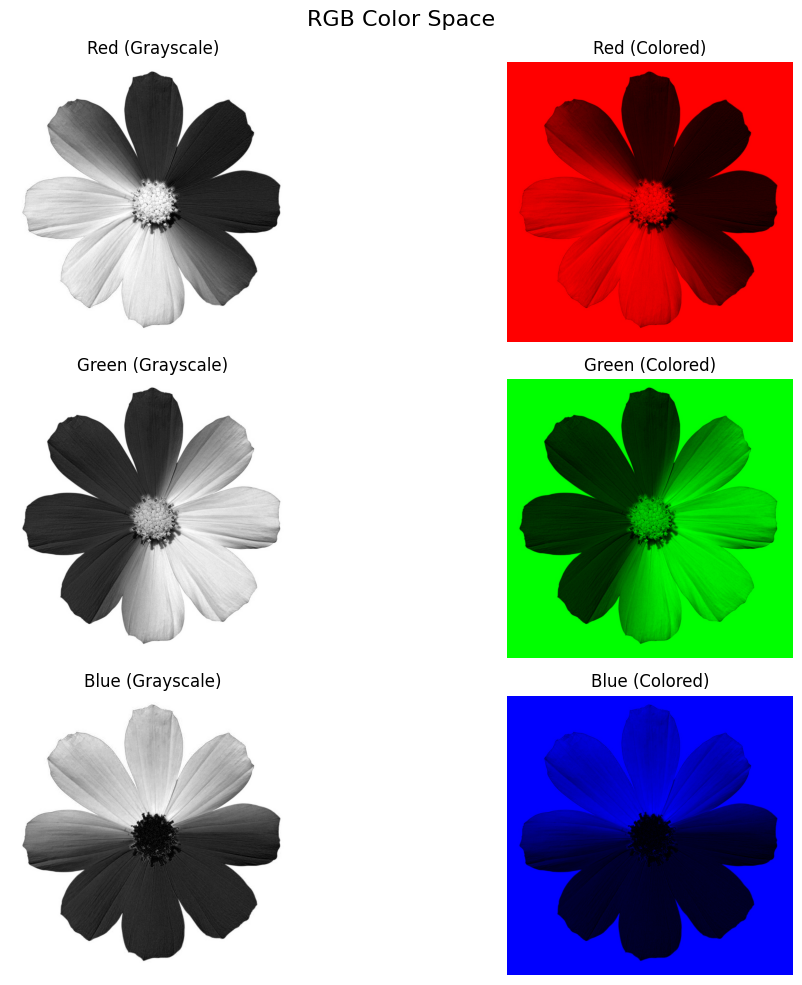

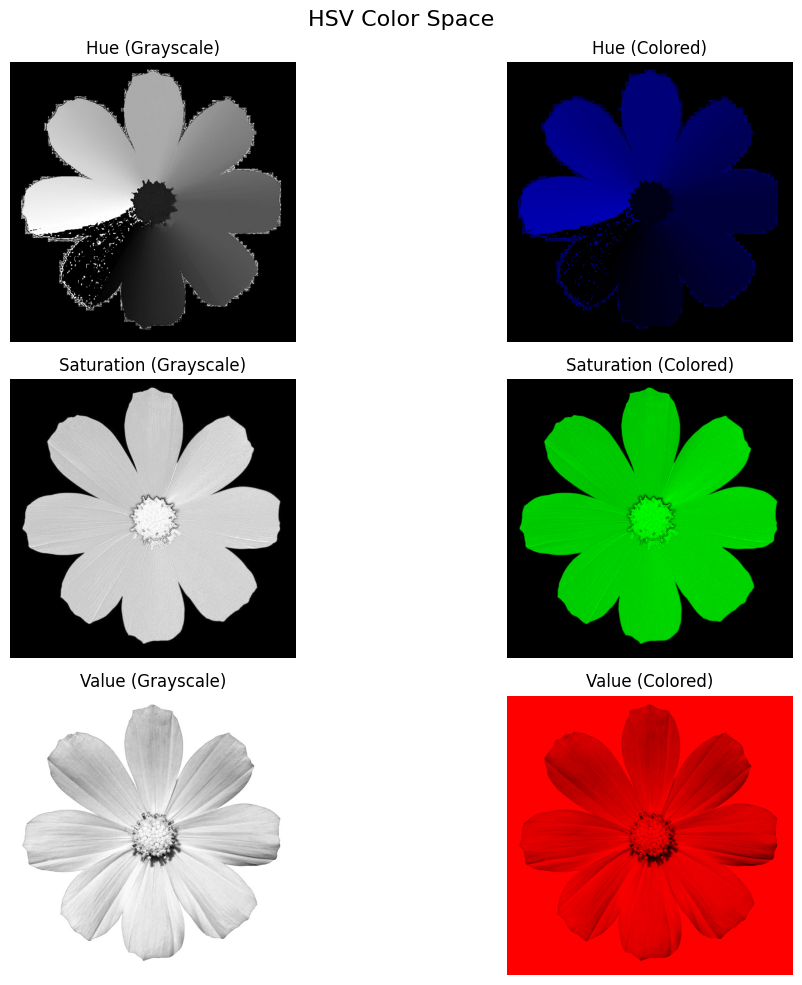

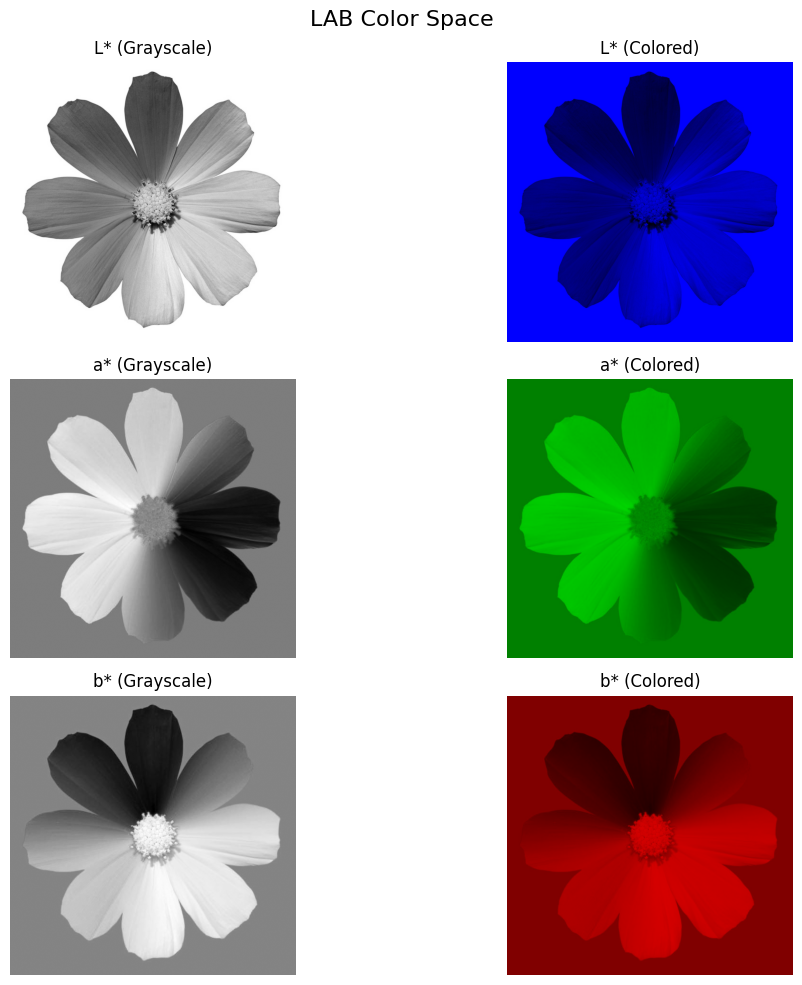

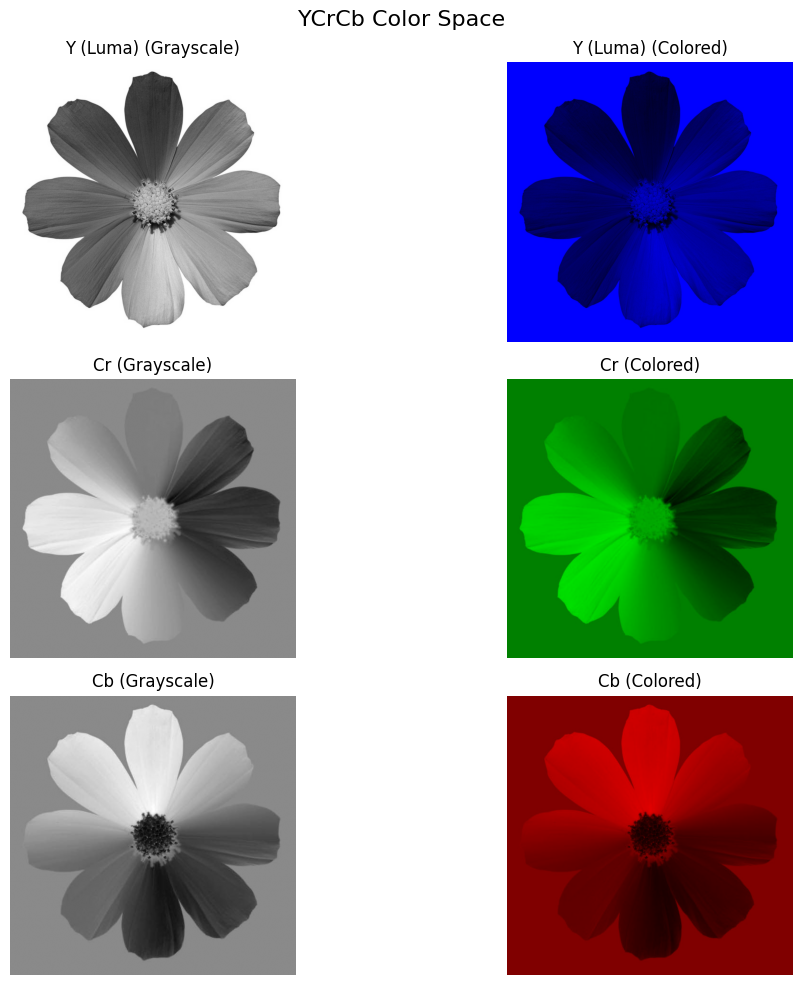

In [15]:
image_bgr = cv.imread("petal.jpg")

# RGB
visualize_color_space(
    image_bgr,
    color_space_name="RGB",
    conversion_code=cv.COLOR_BGR2RGB,
    channel_labels=["Red", "Green", "Blue"]
)

# HSV
visualize_color_space(
    image_bgr,
    color_space_name="HSV",
    conversion_code=cv.COLOR_BGR2HSV,
    channel_labels=["Hue", "Saturation", "Value"]
)

# LAB
visualize_color_space(
    image_bgr,
    color_space_name="LAB",
    conversion_code=cv.COLOR_BGR2Lab,
    channel_labels=["L*", "a*", "b*"]
)

# YCrCb
visualize_color_space(
    image_bgr,
    color_space_name="YCrCb",
    conversion_code=cv.COLOR_BGR2YCrCb,
    channel_labels=["Y (Luma)", "Cr", "Cb"]
)


### Color Depth

- number of bits used to represent the color of a single pixel. It determines how many colors a pixel can display.

- Higher color depth = more colors = better image quality
- measured in bits per pixel(bpp), bits per channel(bpc)


| Color Depth | Type             | Colors per Pixel | Description                                  |
|-------------|------------------|------------------|----------------------------------------------|
| 1-bit       | Monochrome       | 2                | Black and White only                         |
| 8-bit       | Grayscale        | 256              | Shades of gray                               |
| 24-bit      | RGB (8 bits each) | 16.7 million ($256^3$) | Standard true-color images                 |
| 32-bit      | RGBA             | 16.7M + Alpha channel | Same as 24-bit + transparency support      |

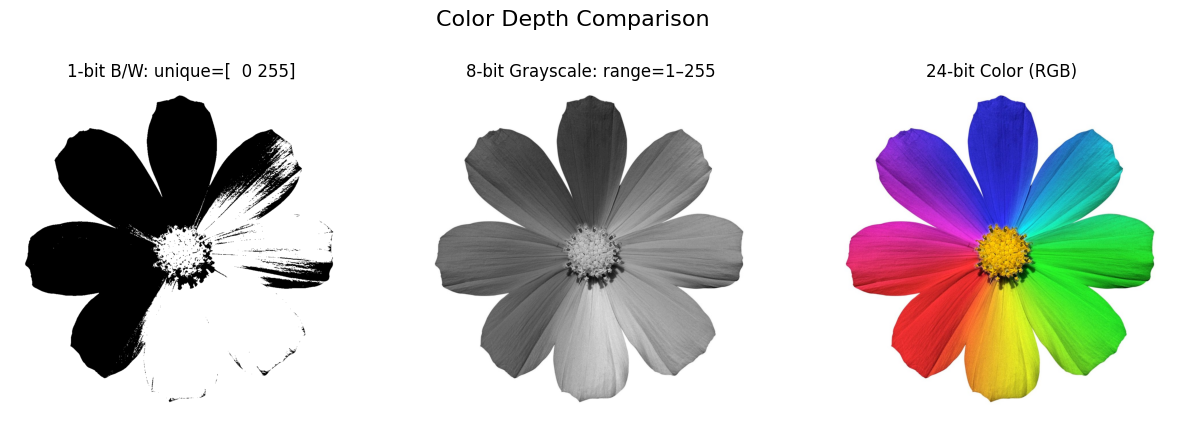


🔍 Pixel Values in 5x5 Patch:
1-bit (B/W):
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]

8-bit Grayscale:
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]

24-bit RGB:
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [12]:
def show_color_depth_versions(img):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # 1-bit (Black & White)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, bw = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

    # 8-bit Grayscale
    gray_8bit = gray.copy()

    # 24-bit RGB (original)
    rgb_24bit = img_rgb

    # Show all
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(bw, cmap='gray')
    axs[0].set_title(f'1-bit B/W: unique={np.unique(bw)}')
    
    axs[1].imshow(gray_8bit, cmap='gray')
    axs[1].set_title(f'8-bit Grayscale: range={gray_8bit.min()}–{gray_8bit.max()}')

    axs[2].imshow(rgb_24bit)
    axs[2].set_title('24-bit Color (RGB)')

    for ax in axs:
        ax.axis('off')
    plt.suptitle('Color Depth Comparison', fontsize=16)
    plt.show()

    # Show pixel values from a small patch
    y, x = 50, 50  # top-left coordinate of patch
    patch_size = 5

    print("\n🔍 Pixel Values in 5x5 Patch:")
    print("1-bit (B/W):")
    print(bw[y:y+patch_size, x:x+patch_size])

    print("\n8-bit Grayscale:")
    print(gray_8bit[y:y+patch_size, x:x+patch_size])

    print("\n24-bit RGB:")
    print(img_rgb[y:y+patch_size, x:x+patch_size])

show_color_depth_versions(image) 

### Image Resolution

- dimensions of an image in pixels [Width x Height]
- Spatial Resolution: detail in image (pixels)
- Optical Resolution: determined by sensor (camera quality)
- Display Resolution: Number of pixels your screen can show 

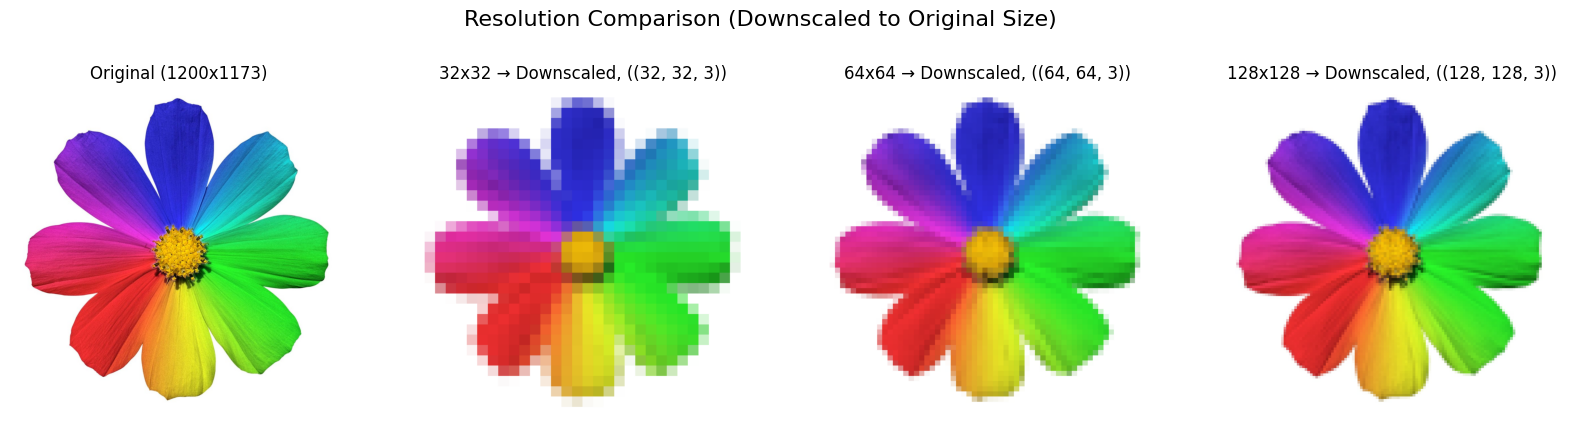

In [14]:
def show_resolution_versions(img):
    resolutions = [32, 64, 128]
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    fig, axs = plt.subplots(1, len(resolutions) + 1, figsize=(20, 5))

    # Original
    axs[0].imshow(img_rgb)
    axs[0].set_title(f'Original ({w}x{h})')
    axs[0].axis('off')

    for i, res in enumerate(resolutions):
        resized = cv.resize(img, (res, res), interpolation=cv.INTER_AREA)
        upscaled = cv.resize(resized, (w, h), interpolation=cv.INTER_NEAREST)
        axs[i + 1].imshow(cv.cvtColor(upscaled, cv.COLOR_BGR2RGB))
        axs[i + 1].set_title(f'{res}x{res} → Downscaled, ({resized.shape})')
        axs[i + 1].axis('off')

    plt.suptitle('Resolution Comparison (Downscaled to Original Size)', fontsize=16)
    plt.show()

show_resolution_versions(image) 

### Histogram Equalization

- technique to improve the contrast in an image, by effectively spreading out the most frequent intensity values.

In [15]:
image = cv.imread('dark_scenery.jpg')

img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img.shape, image.shape 

((601, 900), (601, 900, 3))

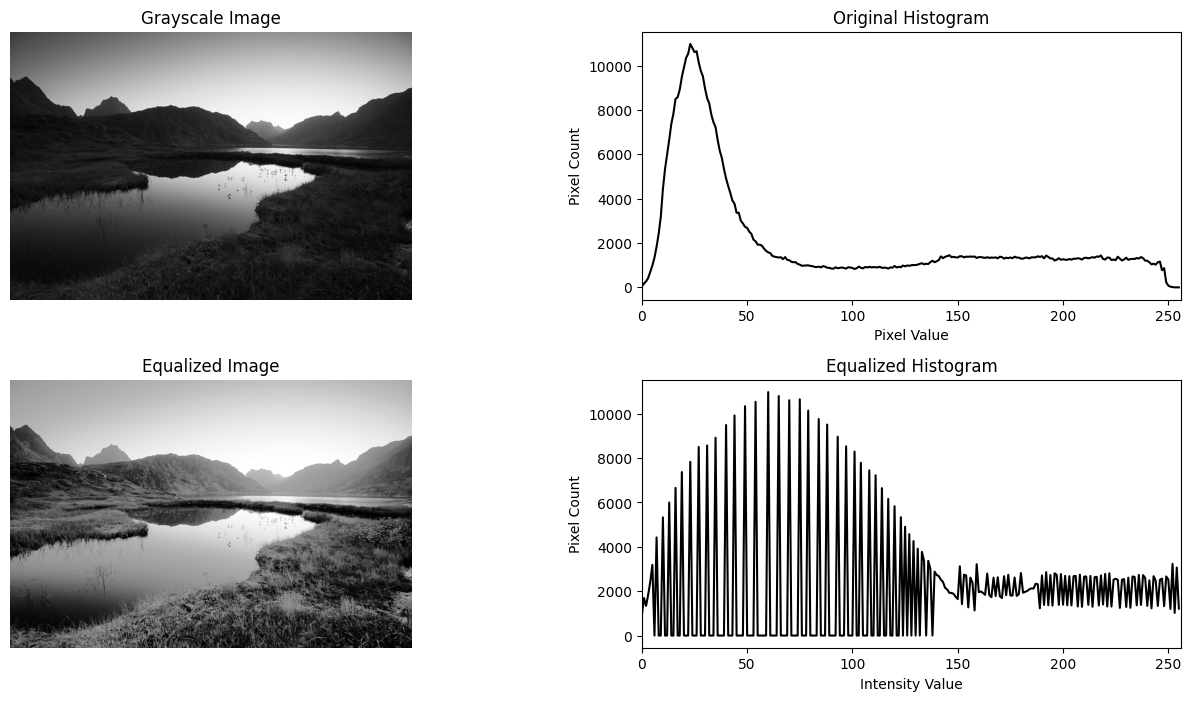

In [16]:
equalized_img = cv.equalizeHist(img) # requires 8-bit single-channel image 

plt.figure(figsize=(16, 8)) 

# Grayscale image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 2)
hist_original = cv.calcHist([img], [0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_original, color='black')
plt.title("Original Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.xlim([0, 256])

# Equalized image
plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Equalized histogram
plt.subplot(2, 2, 4)
hist_equalized = cv.calcHist([equalized_img], [0], None, [256], [0, 256])
plt.plot(hist_equalized, color='black')
plt.title('Equalized Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])

plt.subplots_adjust(wspace=0.3, hspace=0.3)  
plt.show()

### CLAHE Histogram Equalization

- Contrast Limited Adaptive Histogram Equalization
- divides image into tiles, histogram equalization per tile, and limiting the contrast by clipping to prevent noise amplification, and to remove artificial tile boundaries, bilinear interpolation with pixels from neighboring tiles 

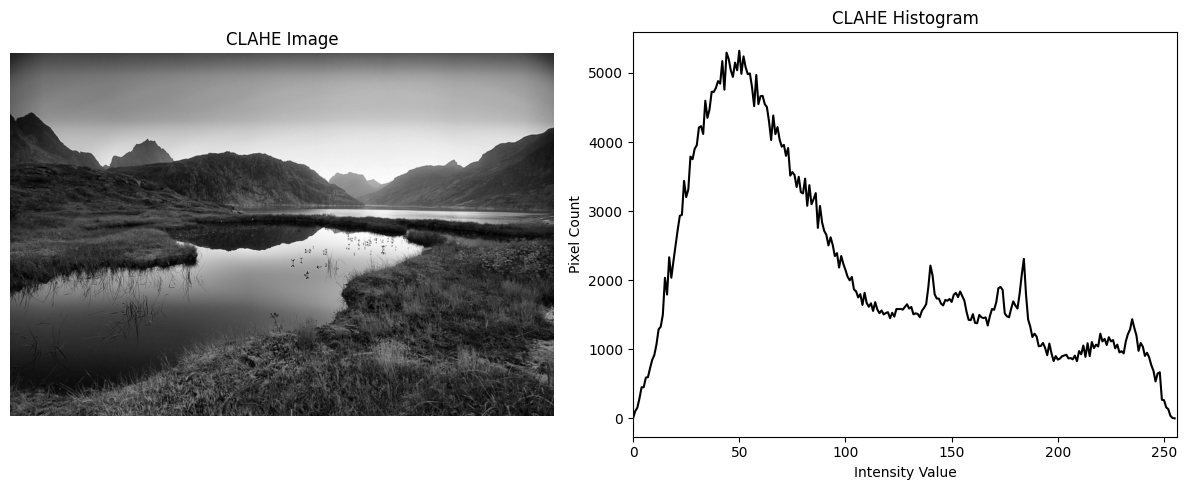

In [17]:
# clipLimit: higher gives more contrast, 0 means no contrast limiting [2.0 to 5.0 usually]
# tileGridSize: size of the grid for histogram equalization (8x8 is common)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.subplot(1, 2, 2)
hist_clahe = cv.calcHist([clahe_img], [0], None, [256], [0, 256])
plt.plot(hist_clahe, color='black')
plt.title('CLAHE Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### Image Filtering and Enchancement

- to modify or enhance an image
- cmoothing (burring), sharpening, edge detection 
- through convolution with a kernel (filter mask)

### Convolution 

- sliding a kernel over an image
- at each position, corresponding pixel values and kernel are multiplied, and the results are summed up to get the new pixel value for the center position of the kernel.

### Use of filters
- noise reduction (smooth filters)
- edge detection
- sharpening
- feature extraction

### Smoothing Filters

i. Mean Filter (Average Filter)
- replaces each pixel value with the average of its neighboring pixel values including itself 

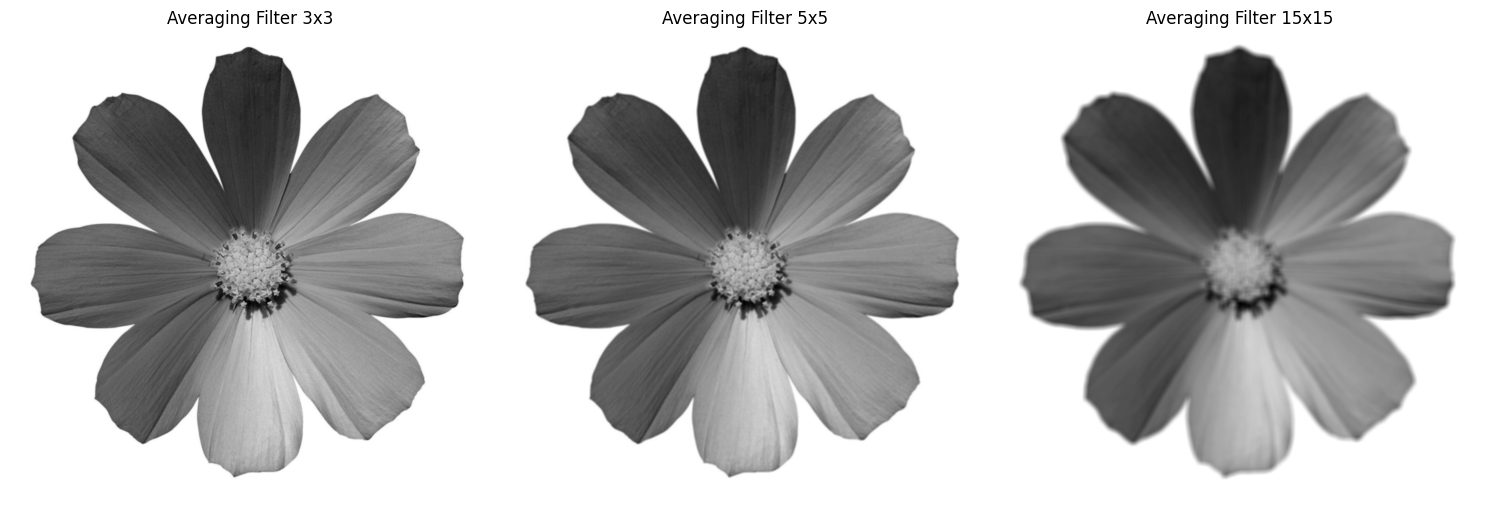

In [11]:
image = cv.imread("petal.jpg")
# average filter
img_grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

kernel_sizes = [(3, 3), (5, 5), (15, 15)]

# Apply average filtering with different kernel sizes
blurred_images = [cv.blur(img_grayscale, ksize) for ksize in kernel_sizes]

# Plotting
plt.figure(figsize=(15, 5))
for i, (ksize, blurred) in enumerate(zip(kernel_sizes, blurred_images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'Averaging Filter {ksize[0]}x{ksize[1]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### ii. Gaussian Filter

- similar to average filter, but with Gaussian kernel
- pixels closer to the center of the kernel are given more weight than pixels further away 
- smoother blur, preserves edges better 

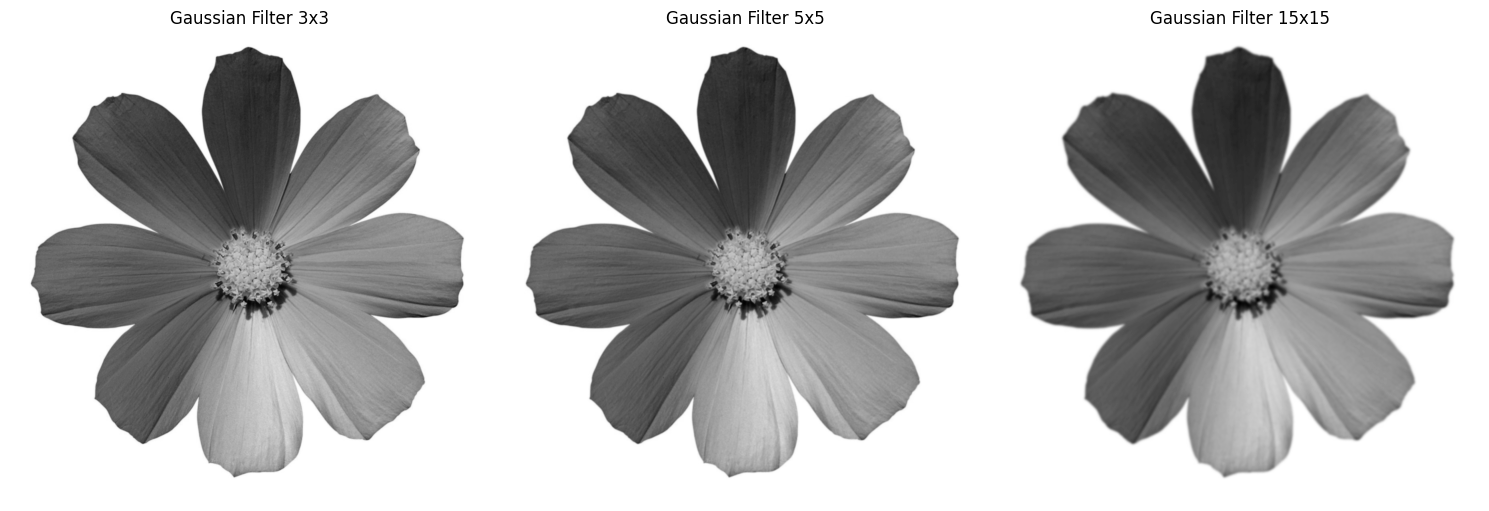

In [12]:
# Define kernel sizes
kernel_sizes = [(3, 3), (5, 5), (15, 15)]

# Apply Gaussian blur with different kernel sizes
gaussian_images = [cv.GaussianBlur(img_grayscale, ksize, 0) for ksize in kernel_sizes]

# Plotting
plt.figure(figsize=(15, 5))
for i, (ksize, blurred) in enumerate(zip(kernel_sizes, gaussian_images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'Gaussian Filter {ksize[0]}x{ksize[1]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

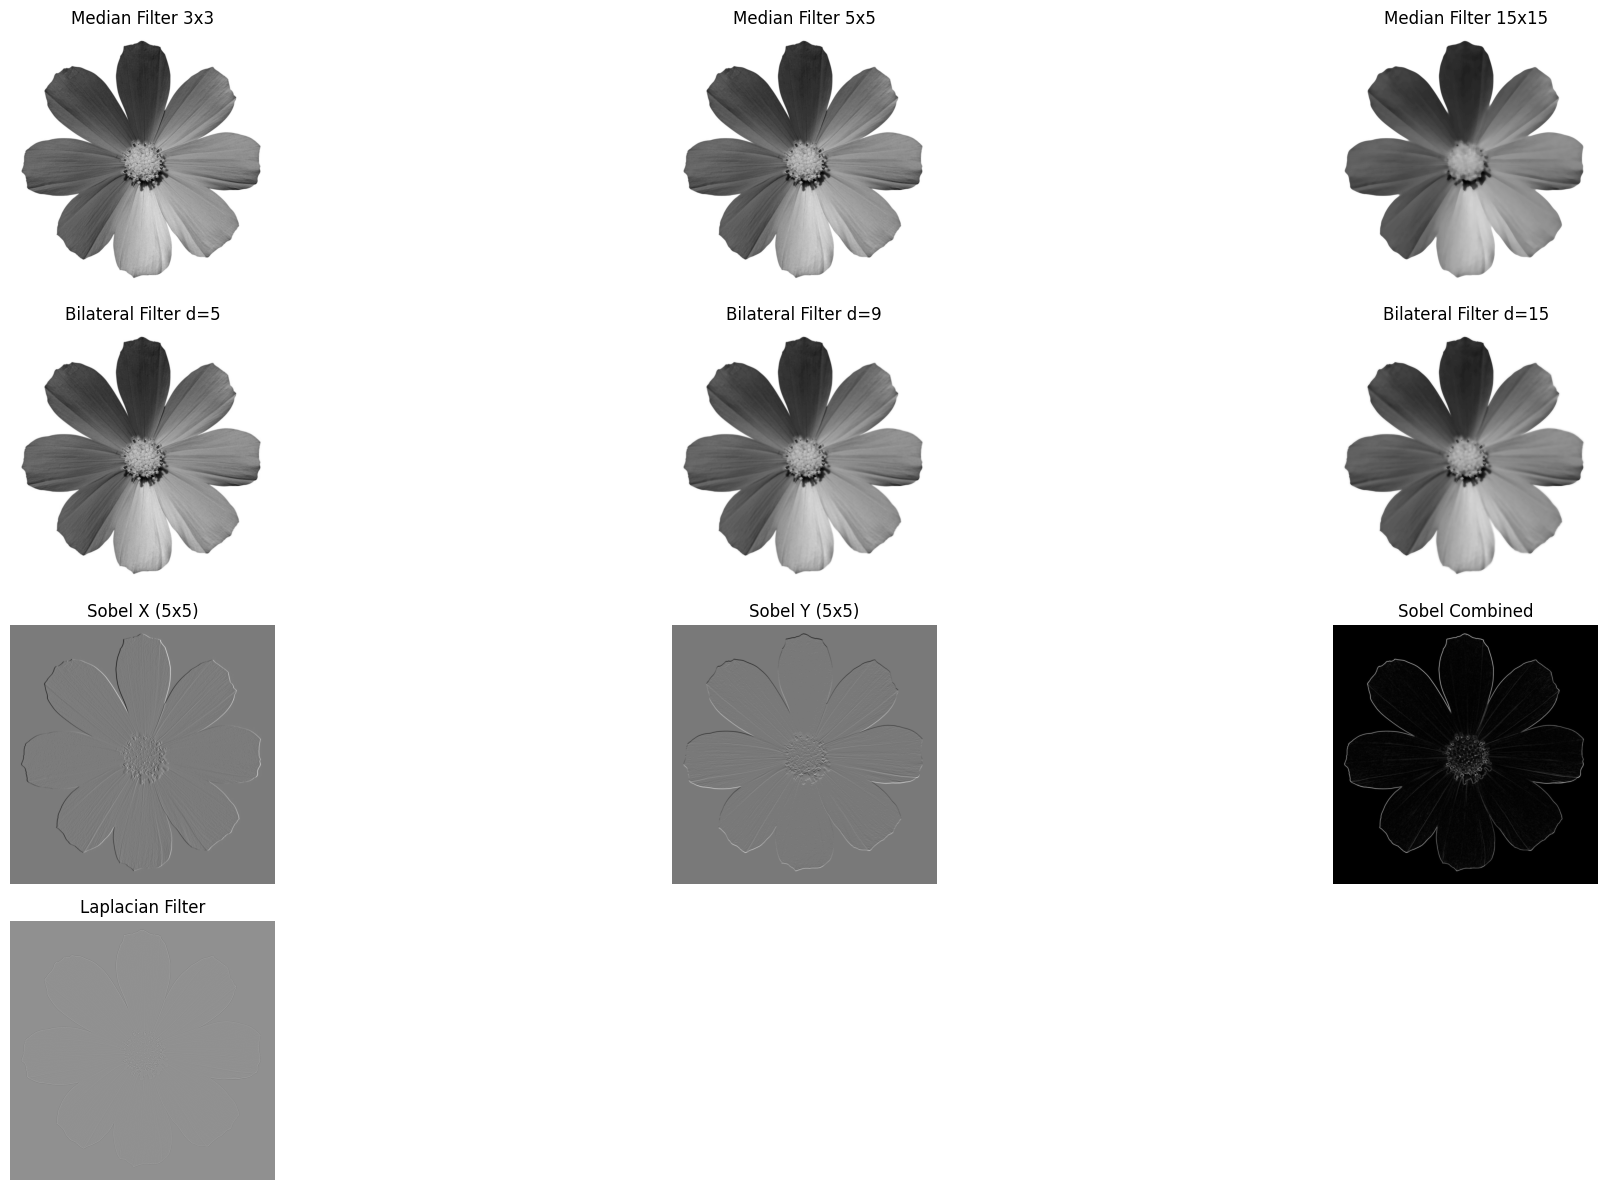

In [13]:
plt.figure(figsize=(20, 12))

# --- 1. Median Blur ---
# Preserves edges better than average and Gaussian, great for salt-and-pepper noise
median_sizes = [3, 5, 15]
for i, k in enumerate(median_sizes):
    median_blur = cv.medianBlur(img_grayscale, k)
    plt.subplot(4, 3, i + 1)
    plt.imshow(median_blur, cmap='gray')
    plt.title(f'Median Filter {k}x{k}')
    plt.axis('off')

# --- 2. Bilateral Filter ---
# Smoothens while keeping edges sharp. Very good for denoising with edge preservation.
diameters = [5, 9, 15]
for i, d in enumerate(diameters):
    bilateral = cv.bilateralFilter(img_grayscale, d, 75, 75)
    plt.subplot(4, 3, i + 4)
    plt.imshow(bilateral, cmap='gray')
    plt.title(f'Bilateral Filter d={d}')
    plt.axis('off')

# --- 3. Sobel Edge Detection ---
# Detects edges by computing gradients. Can be used in x or y direction.
sobelx = cv.Sobel(img_grayscale, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img_grayscale, cv.CV_64F, 0, 1, ksize=5)
sobel_combined = cv.magnitude(sobelx, sobely)

plt.subplot(4, 3, 7)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X (5x5)')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y (5x5)')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

# --- 4. Laplacian Edge Detection ---
# Computes second derivative, highlights areas of rapid intensity change.
laplacian = cv.Laplacian(img_grayscale, cv.CV_64F)

plt.subplot(4, 3, 10)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

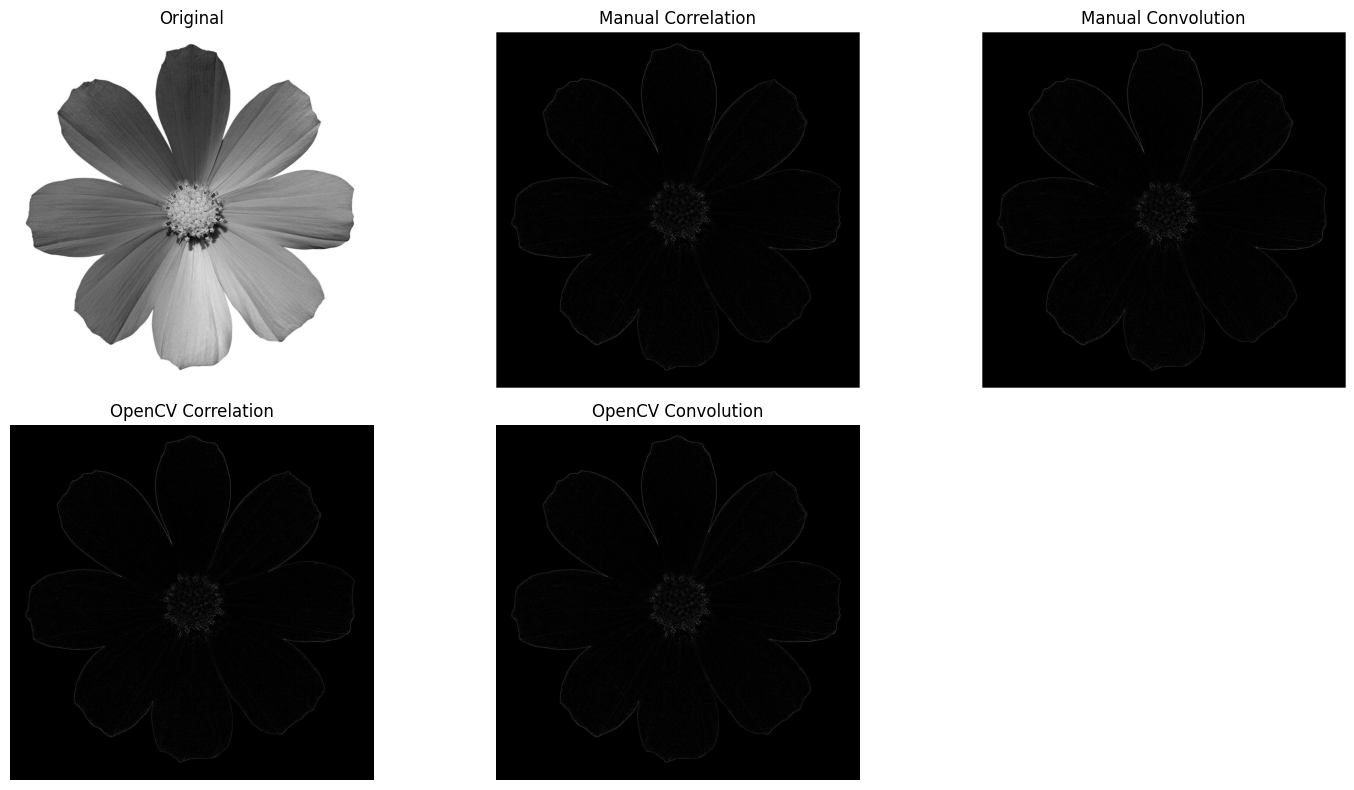

In [14]:


def correlate2d(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(img, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# --------------------------
# Manual Convolution Function (flip kernel before correlate)
# --------------------------
def convolve2d(img, kernel):
    flipped_kernel = np.flipud(np.fliplr(kernel))  # flip vertically and horizontally
    return correlate2d(img, flipped_kernel)

# --------------------------
# Define Multiple Kernels
# --------------------------

# Edge Detection
edge_kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

# Box Blur
blur_kernel = np.ones((3, 3), dtype=np.float32) / 9

# Sharpening
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# --------------------------
# Choose One Kernel to Test First
# --------------------------
kernel = edge_kernel  # Change to blur_kernel or sharpen_kernel for comparison

# Apply Manual Correlation & Convolution
manual_corr = correlate2d(img_grayscale, kernel)
manual_conv = convolve2d(img_grayscale, kernel)

# Apply OpenCV filter2D (performs correlation only)
opencv_corr = cv.filter2D(img_grayscale, -1, kernel)

# To simulate convolution in OpenCV, flip the kernel
flipped_kernel = np.flipud(np.fliplr(kernel))
opencv_conv = cv.filter2D(img_grayscale, -1, flipped_kernel)

# --------------------------
# Prepare for Visualization
# --------------------------
def prepare(img):
    return np.clip(img, 0, 255).astype(np.uint8)

manual_corr = prepare(manual_corr)
manual_conv = prepare(manual_conv)

# --------------------------
# Plotting Results
# --------------------------
titles = ["Original", "Manual Correlation", "Manual Convolution",
          "OpenCV Correlation", "OpenCV Convolution"]

images = [img_grayscale, manual_corr, manual_conv, opencv_corr, opencv_conv]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### Implementation of filters, correlation and convolution

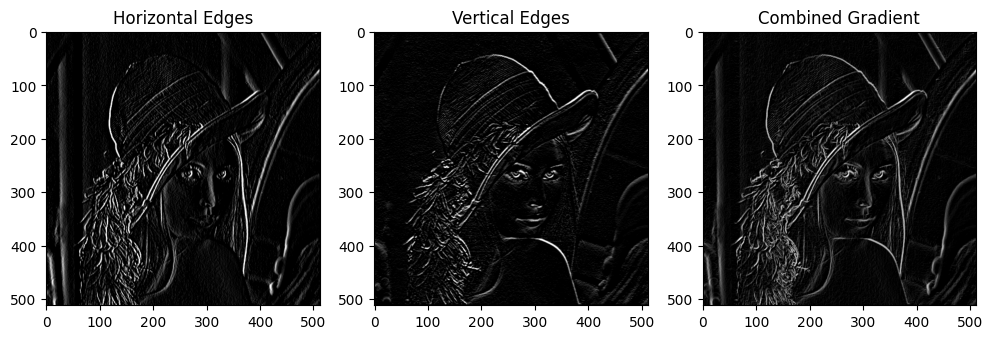

In [5]:
# edge detection 
# Sobel kernels
img_grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

grad_x = cv.filter2D(img_grayscale, -1, sobel_x)
grad_y = cv.filter2D(img_grayscale, -1, sobel_y)
combined = cv.magnitude(grad_x.astype(np.float32), grad_y.astype(np.float32))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(grad_x, cmap='gray'); plt.title("Horizontal Edges")
plt.subplot(1, 3, 2); plt.imshow(grad_y, cmap='gray'); plt.title("Vertical Edges")
plt.subplot(1, 3, 3); plt.imshow(combined, cmap='gray'); plt.title("Combined Gradient")
plt.show()


(27, 54)


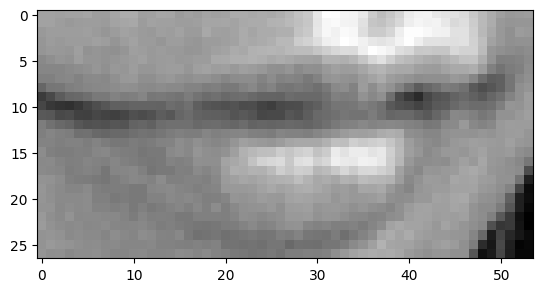

In [10]:
#template matching 
template = cv.imread("template2.png" )
template_grayscale = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
print(template_grayscale.shape)
plt.imshow(template_grayscale, cmap='gray')

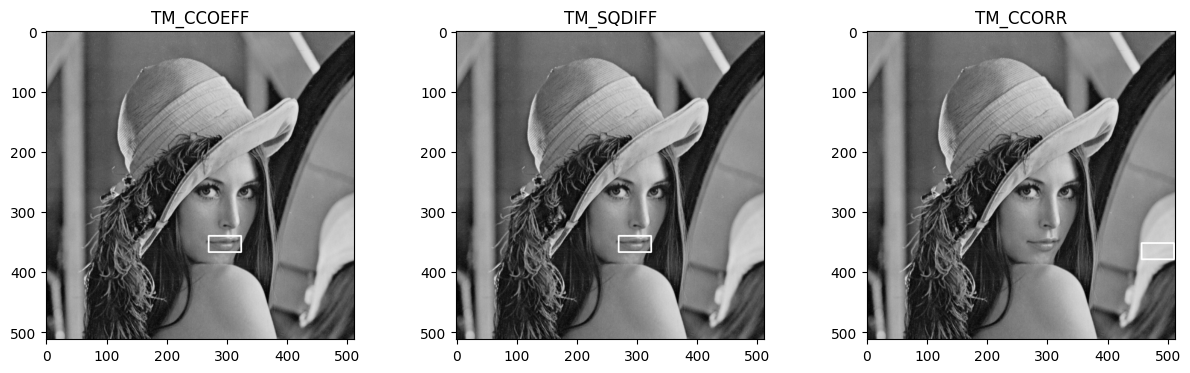

In [12]:
methods = [cv.TM_CCOEFF, cv.TM_SQDIFF, cv.TM_CCORR]
method_names = ['TM_CCOEFF', 'TM_SQDIFF', 'TM_CCORR']

plt.figure(figsize=(15, 4))

for i, method in enumerate(methods):
    result = cv.matchTemplate(img_grayscale, template_grayscale, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

    top_left = min_loc if method == cv.TM_SQDIFF else max_loc
    h, w = template_grayscale.shape
    img_copy = img_grayscale.copy()
    cv.rectangle(img_copy, top_left, (top_left[0] + w, top_left[1] + h), 255, 2)

    plt.subplot(1, 3, i + 1)
    plt.imshow(img_copy, cmap='gray')
    plt.title(method_names[i])

plt.show()

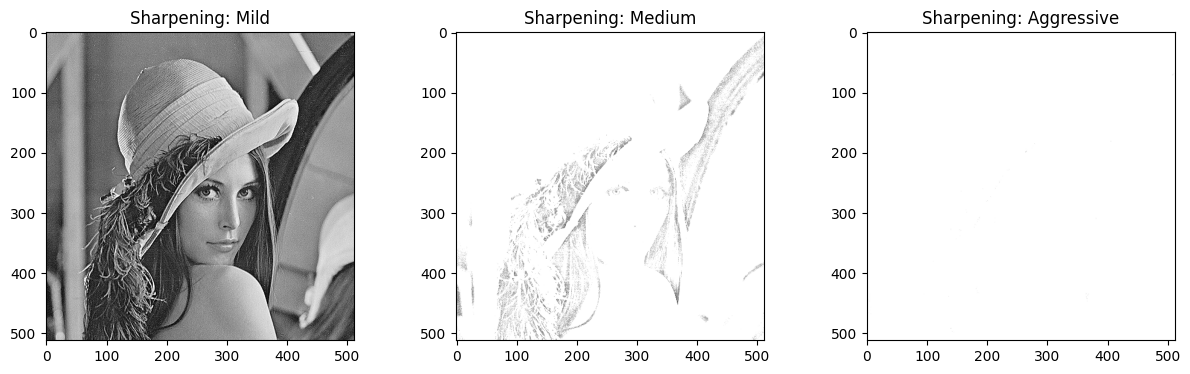

In [14]:
#sharpening
# Light, Medium, Strong sharpening
kernels = [
    np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),   # normal
    np.array([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]),   # stronger
    np.array([[1, -2, 1], [-2, 13, -2], [1, -2, 1]]) / 1  # very sharp
]

titles = ['Mild', 'Medium', 'Aggressive']

plt.figure(figsize=(15, 4))
for i, kernel in enumerate(kernels):
    sharpened = cv.filter2D(img_grayscale, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    plt.title(f"Sharpening: {titles[i]}")
plt.show()

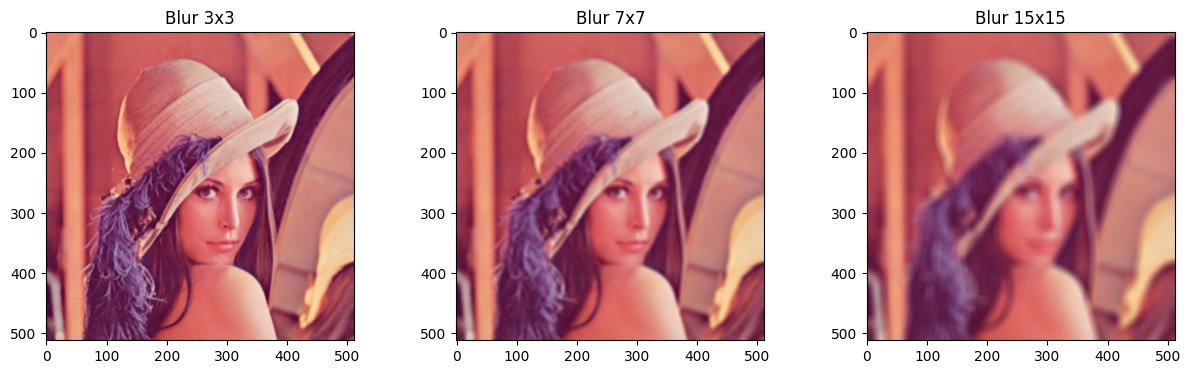

In [15]:
# blurring
sizes = [3, 7, 15]
plt.figure(figsize=(15, 4))

for i, size in enumerate(sizes):
    kernel = np.ones((size, size), np.float32) / (size * size)
    blurred = cv.filter2D(image, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
    plt.title(f"Blur {size}x{size}")

plt.show()

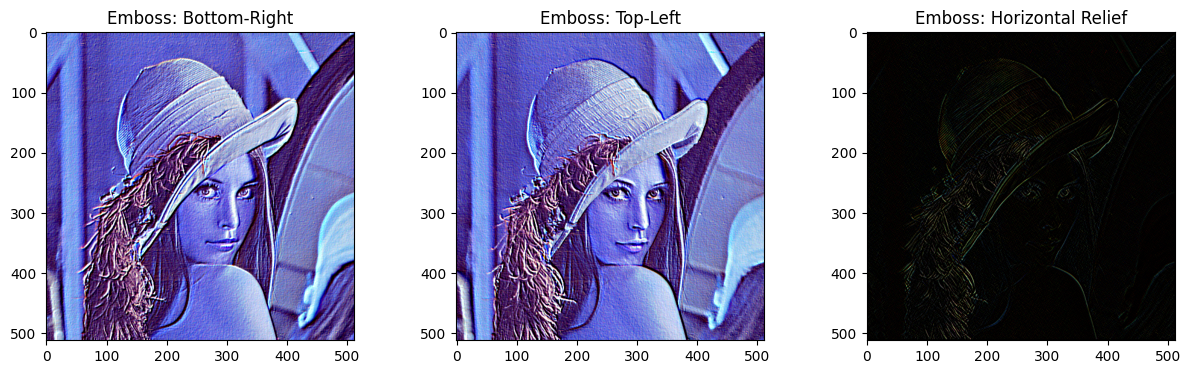

In [16]:
# embossing 
# Emboss in different directions
kernels = [
    np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]),
    np.array([[0, 1, 2], [-1, 1, 1], [-2, -1, 0]]),
    np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
]
titles = ['Emboss: Bottom-Right', 'Emboss: Top-Left', 'Emboss: Horizontal Relief']

plt.figure(figsize=(15, 4))
for i, kernel in enumerate(kernels):
    embossed = cv.filter2D(image, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(embossed, cmap='gray')
    plt.title(titles[i])

plt.show()